In [110]:
import pandas as pd
import os.path as op
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib

from definitions import RESULTS_FOLDER, FIGURE_FOLDER, ROOT_FOLDER
%matplotlib notebook

In [107]:
results_folder = op.join(RESULTS_FOLDER, 'plusmaze_deval')
figure_folder = op.join(ROOT_FOLDER, 'figures', 'plusmaze_deval')
if not op.exists(figure_folder):
    os.makedirs(figure_folder)

In [3]:
control_results = pd.read_csv(op.join(results_folder, 'control', 'summary.csv'))
control_results['group'] = 'control'
hpc_lesion_results = pd.read_csv(op.join(results_folder, 'inactivate_HPC', 'summary.csv'))
hpc_lesion_results['group'] = 'HPC'

In [119]:
def label_trial(row):
    if row['trial'] == 27.:
        return 'Non-deval'
    elif row['trial'] == 29.:
        return 'Deval'

In [120]:
control_results['condition'] = control_results.apply(lambda row: label_trial(row), axis=1)
hpc_lesion_results['condition'] = hpc_lesion_results.apply(lambda row: label_trial(row), axis=1)

In [121]:
control_results

,Unnamed: 0,agent,group,score,trial,condition
0,0,0.0,control,place,27.0,Non-deval
1,1,0.0,control,response,29.0,Deval
2,2,1.0,control,place,27.0,Non-deval
3,3,1.0,control,response,29.0,Deval
4,4,2.0,control,response,27.0,Non-deval
5,5,2.0,control,place,29.0,Deval
6,6,3.0,control,place,27.0,Non-deval
7,7,3.0,control,response,29.0,Deval
8,8,4.0,control,response,27.0,Non-deval
9,9,4.0,control,response,29.0,Deval


In [122]:
ctrl_numbers = control_results.pivot_table(index=['condition', 'score'],aggfunc=len).reset_index().sort_values(by='condition',ascending=False)
les_numbers = hpc_lesion_results.pivot_table(index=['condition', 'score'],aggfunc=len).reset_index().sort_values(by='condition',ascending=False)

<IPython.core.display.Javascript object>


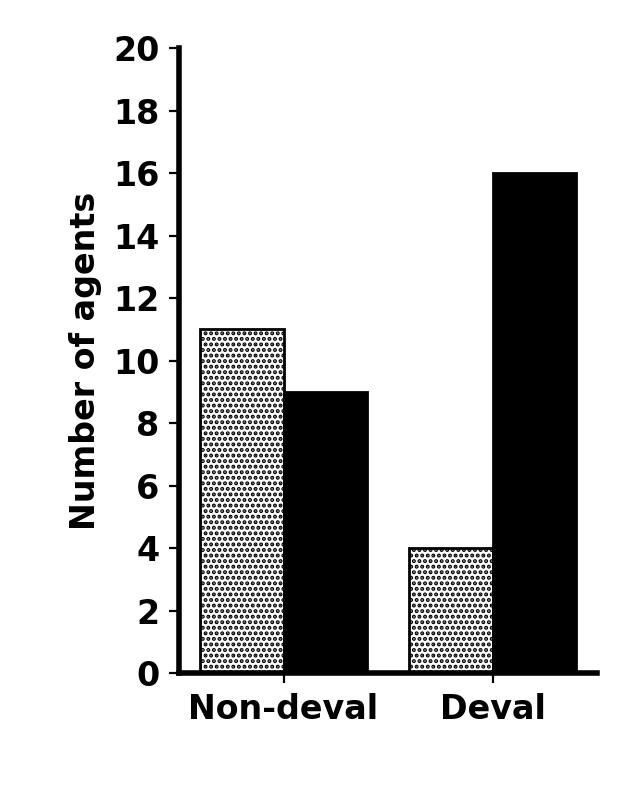

In [146]:
font = {'weight' : 'bold', 'size':12}

matplotlib.rc('font', **font)  # pass in the font dict as kwargs
matplotlib.rc('axes', linewidth=2)


def kosaki_style_plot(data):
    fig, ax = plt.subplots(figsize=[3.2,4])
    colpal = [(0.,0.,0.), (1.,1.,1.)][::-1]

    bar = sns.barplot(data=data, y='agent',x='condition', hue='score',palette=colpal, edgecolor='black')

    hatches = ['......', '......', '', '']

    for i,thisbar in enumerate(bar.patches):
        # Set a different hatch for each bar
        thisbar.set_hatch(hatches[i])

    plt.ylabel('Number of agents', fontweight='bold')
    plt.ylim([0,20])
    plt.legend()
    plt.tight_layout()
    plt.xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    yint = range(0, 20+1,2)
    plt.yticks(yint)
    ax.get_legend().set_visible(False)

    
    return ax
    
    
ax = kosaki_style_plot(ctrl_numbers)
plt.savefig(op.join(figure_folder, 'control.pdf'))

<IPython.core.display.Javascript object>


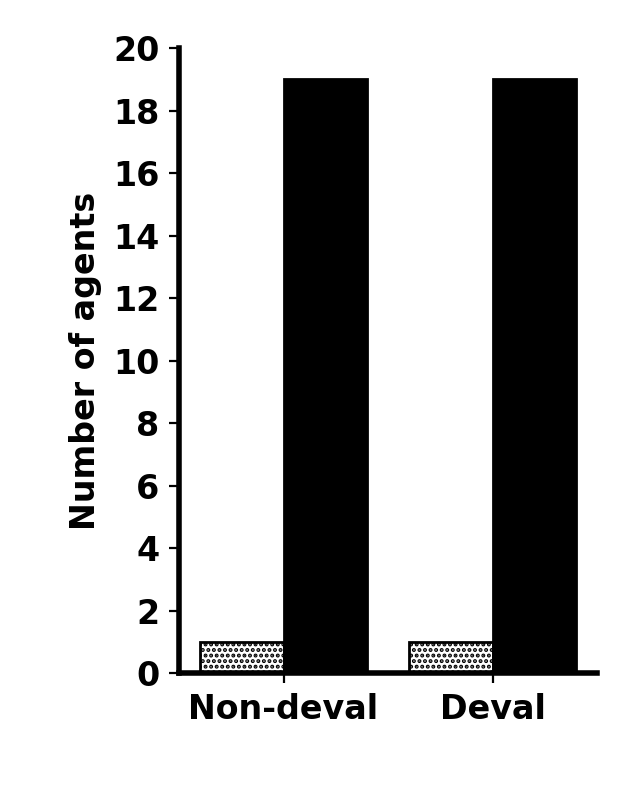

In [147]:
ax = kosaki_style_plot(les_numbers)
plt.savefig(op.join(figure_folder, 'lesion.pdf'))